### 01. MicaSense: DN to Radiance Conversion: Pininj
#### Gayantha R. L. Kodikara, 30/08/2023 @UWM Update: 08/03/2024, 31/05/2024

In [1]:
%matplotlib inline
# Import libraries
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import exiftool
from osgeo import gdal
from osgeo import gdal_array
from numpy import savetxt

In [2]:
# Read raw image DN values
# reads 16 bit tif - this will likely not work for 12 bit images
imageR1  = 'IMG_0177_1.tif'
imageR2  = 'IMG_0177_2.tif'
imageR3  = 'IMG_0177_3.tif'
imageR4  = 'IMG_0177_4.tif'
imageR5  = 'IMG_0177_5.tif'
image1  = plt.imread(imageR1)
image2  = plt.imread(imageR2)
image3  = plt.imread(imageR3)
image4  = plt.imread(imageR4)
image5  = plt.imread(imageR5)

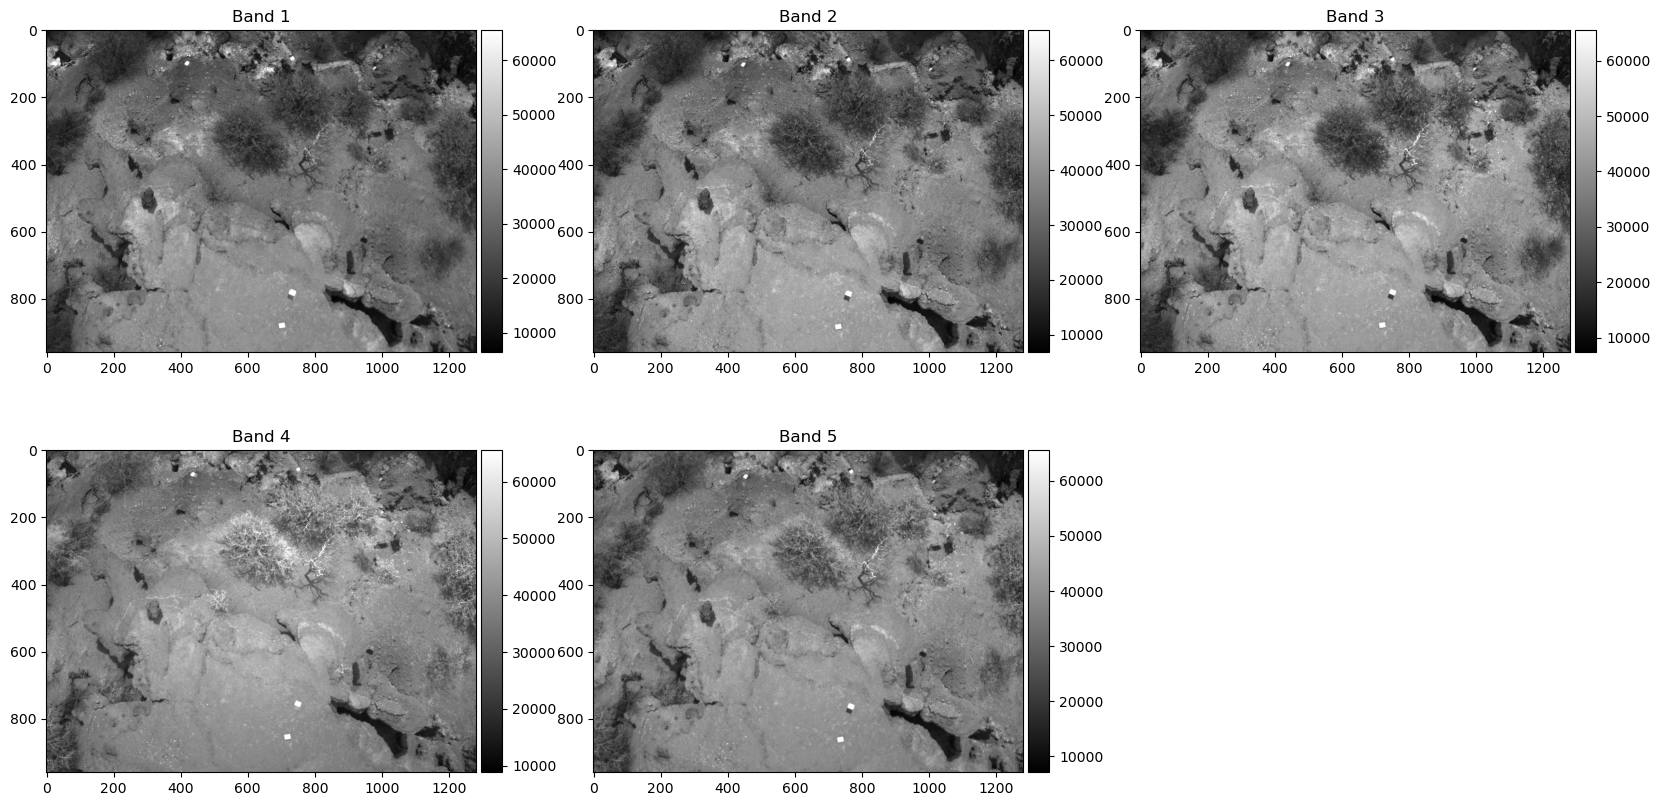

In [3]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(image1, cmap='gray')
im2 = ax2.imshow(image2, cmap='gray')
im3 = ax3.imshow(image3, cmap='gray')
im4 = ax4.imshow(image4, cmap='gray')
im5 = ax5.imshow(image5, cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
plt.show()

In [4]:
# Band 1
from exiftool import ExifToolHelper
with ExifToolHelper() as et:
    record1 = et.get_tags([imageR1], tags=['EXIF:BlackLevel','EXIF:ExposureTime','XMP:RadiometricCalibration','EXIF:ISOSpeed','EXIF:BitsPerSample','XMP:VignettingCenter','XMP:VignettingPolynomial'])

DarkLevel1 = np.asarray((record1[0].get('EXIF:BlackLevel').split()),dtype=float).mean()
ExposureTime1 = record1[0].get('EXIF:ExposureTime')
RadiomCalc1 = record1[0].get('XMP:RadiometricCalibration')
gain1 = float(record1[0].get('EXIF:ISOSpeed')/100.0)
BitsperSample1 = record1[0].get('EXIF:BitsPerSample')  
VigneCenter1 = record1[0].get('XMP:VignettingCenter') 
VignePoly1 = record1[0].get('XMP:VignettingPolynomial') 
xVignette1 = VigneCenter1[0]
yVignette1 = VigneCenter1[1]
a1_1 = RadiomCalc1[0]
a1_2 = RadiomCalc1[1]
a1_3 = RadiomCalc1[2]
image1T = image1.T
xDim1 = image1T.shape[0]
yDim1 = image1T.shape[1]
VignePoly1.reverse()
VignePoly1.append(1.)
VignettePoly1 = np.array(VignePoly1, dtype = float)
x1, y1 = np.meshgrid(np.arange(xDim1), np.arange(yDim1))
r1 = np.hypot((x1 - xVignette1), (y1 - yVignette1))
vignette1 = 1. / np.polyval(VignettePoly1, r1)
R1 = 1.0 / (1.0 + a1_2 * y1 / ExposureTime1 - a1_3 * y1)
L1 = vignette1 * R1 *(image1 - DarkLevel1)
dnMax1 = float(2**BitsperSample1)
radianceImage1 = L1.astype(float)/(gain1 * ExposureTime1) * float(a1_1)/dnMax1

In [5]:
# Band 2
from exiftool import ExifToolHelper
with ExifToolHelper() as et:
    record2 = et.get_tags([imageR2], tags=['EXIF:BlackLevel','EXIF:ExposureTime','XMP:RadiometricCalibration','EXIF:ISOSpeed','EXIF:BitsPerSample','XMP:VignettingCenter','XMP:VignettingPolynomial'])

DarkLevel2 = np.asarray((record2[0].get('EXIF:BlackLevel').split()),dtype=float).mean()
ExposureTime2 = record2[0].get('EXIF:ExposureTime')
RadiomCalc2 = record2[0].get('XMP:RadiometricCalibration')
gain2 = float(record2[0].get('EXIF:ISOSpeed')/100.0)
BitsperSample2 = record2[0].get('EXIF:BitsPerSample')  
VigneCenter2 = record2[0].get('XMP:VignettingCenter') 
VignePoly2 = record2[0].get('XMP:VignettingPolynomial') 
xVignette2 = VigneCenter2[0]
yVignette2 = VigneCenter2[1]
a2_1 = RadiomCalc2[0]
a2_2 = RadiomCalc2[1]
a2_3 = RadiomCalc2[2]
image2T = image2.T
xDim2 = image2T.shape[0]
yDim2 = image2T.shape[1]
VignePoly2.reverse()
VignePoly2.append(1.)
VignettePoly2 = np.array(VignePoly2, dtype = float)
x2, y2 = np.meshgrid(np.arange(xDim2), np.arange(yDim2))
r2 = np.hypot((x2 - xVignette2), (y2 - yVignette2))
vignette2 = 1. / np.polyval(VignettePoly2, r2)
R2 = 1.0 / (1.0 + a2_2 * y2 / ExposureTime2 - a2_3 * y2)
L2 = vignette2 * R2 *(image2 - DarkLevel2)
dnMax2 = float(2**BitsperSample2)
radianceImage2 = L2.astype(float)/(gain2 * ExposureTime2) * float(a2_1)/dnMax2

In [6]:
# Band 3
from exiftool import ExifToolHelper
with ExifToolHelper() as et:
    record3 = et.get_tags([imageR3], tags=['EXIF:BlackLevel','EXIF:ExposureTime','XMP:RadiometricCalibration','EXIF:ISOSpeed','EXIF:BitsPerSample','XMP:VignettingCenter','XMP:VignettingPolynomial'])

DarkLevel3 = np.asarray((record3[0].get('EXIF:BlackLevel').split()),dtype=float).mean()
ExposureTime3 = record3[0].get('EXIF:ExposureTime')
RadiomCalc3 = record3[0].get('XMP:RadiometricCalibration')
gain3 = float(record3[0].get('EXIF:ISOSpeed')/100.0)
BitsperSample3 = record3[0].get('EXIF:BitsPerSample')  
VigneCenter3 = record3[0].get('XMP:VignettingCenter') 
VignePoly3 = record3[0].get('XMP:VignettingPolynomial') 
xVignette3 = VigneCenter3[0]
yVignette3 = VigneCenter3[1]
a3_1 = RadiomCalc3[0]
a3_2 = RadiomCalc3[1]
a3_3 = RadiomCalc3[2]
image3T = image3.T
xDim3 = image3T.shape[0]
yDim3 = image3T.shape[1]
VignePoly3.reverse()
VignePoly3.append(1.)
VignettePoly3 = np.array(VignePoly3, dtype = float)
x3, y3 = np.meshgrid(np.arange(xDim3), np.arange(yDim3))
r3 = np.hypot((x3 - xVignette3), (y3 - yVignette3))
vignette3 = 1. / np.polyval(VignettePoly3, r3)
R3 = 1.0 / (1.0 + a3_2 * y3 / ExposureTime3 - a3_3 * y3)
L3 = vignette3 * R3 *(image3 - DarkLevel3)
dnMax3 = float(2**BitsperSample3)
radianceImage3 = L3.astype(float)/(gain3 * ExposureTime3) * float(a3_1)/dnMax3

In [7]:
# Band 4
from exiftool import ExifToolHelper
with ExifToolHelper() as et:
    record4 = et.get_tags([imageR4], tags=['EXIF:BlackLevel','EXIF:ExposureTime','XMP:RadiometricCalibration','EXIF:ISOSpeed','EXIF:BitsPerSample','XMP:VignettingCenter','XMP:VignettingPolynomial'])

DarkLevel4 = np.asarray((record4[0].get('EXIF:BlackLevel').split()),dtype=float).mean()
ExposureTime4 = record4[0].get('EXIF:ExposureTime')
RadiomCalc4 = record4[0].get('XMP:RadiometricCalibration')
gain4 = float(record4[0].get('EXIF:ISOSpeed')/100.0)
BitsperSample4 = record4[0].get('EXIF:BitsPerSample')  
VigneCenter4 = record4[0].get('XMP:VignettingCenter') 
VignePoly4 = record4[0].get('XMP:VignettingPolynomial') 
xVignette4 = VigneCenter4[0]
yVignette4 = VigneCenter4[1]
a4_1 = RadiomCalc4[0]
a4_2 = RadiomCalc4[1]
a4_3 = RadiomCalc4[2]
image4T = image4.T
xDim4 = image4T.shape[0]
yDim4 = image4T.shape[1]
VignePoly4.reverse()
VignePoly4.append(1.)
VignettePoly4 = np.array(VignePoly4, dtype = float)
x4, y4 = np.meshgrid(np.arange(xDim4), np.arange(yDim4))
r4 = np.hypot((x4 - xVignette4), (y4 - yVignette4))
vignette4 = 1. / np.polyval(VignettePoly4, r4)
R4 = 1.0 / (1.0 + a4_2 * y4 / ExposureTime4 - a4_3 * y4)
L4 = vignette4 * R4 *(image4 - DarkLevel4)
dnMax4 = float(2**BitsperSample4)
radianceImage4 = L4.astype(float)/(gain4 * ExposureTime4) * float(a4_1)/dnMax4

In [8]:
# Band 5
from exiftool import ExifToolHelper
with ExifToolHelper() as et:
    record5 = et.get_tags([imageR5], tags=['EXIF:BlackLevel','EXIF:ExposureTime','XMP:RadiometricCalibration','EXIF:ISOSpeed','EXIF:BitsPerSample','XMP:VignettingCenter','XMP:VignettingPolynomial'])

DarkLevel5 = np.asarray((record5[0].get('EXIF:BlackLevel').split()),dtype=float).mean()
ExposureTime5 = record5[0].get('EXIF:ExposureTime')
RadiomCalc5 = record5[0].get('XMP:RadiometricCalibration')
gain5 = float(record5[0].get('EXIF:ISOSpeed')/100.0)
BitsperSample5 = record5[0].get('EXIF:BitsPerSample')  
VigneCenter5 = record5[0].get('XMP:VignettingCenter') 
VignePoly5 = record5[0].get('XMP:VignettingPolynomial') 
xVignette5 = VigneCenter5[0]
yVignette5 = VigneCenter5[1]
a5_1 = RadiomCalc5[0]
a5_2 = RadiomCalc5[1]
a5_3 = RadiomCalc5[2]
image5T = image5.T
xDim5 = image5T.shape[0]
yDim5 = image5T.shape[1]
VignePoly5.reverse()
VignePoly5.append(1.)
VignettePoly5 = np.array(VignePoly5, dtype = float)
x5, y5 = np.meshgrid(np.arange(xDim5), np.arange(yDim5))
r5 = np.hypot((x5 - xVignette5), (y5 - yVignette5))
vignette5 = 1. / np.polyval(VignettePoly5, r5)
R5 = 1.0 / (1.0 + a5_2 * y5 / ExposureTime5 - a5_3 * y5)
L5 = vignette5 * R5 *(image5 - DarkLevel5)
dnMax5 = float(2**BitsperSample5)
radianceImage5 = L5.astype(float)/(gain5 * ExposureTime5) * float(a5_1)/dnMax5

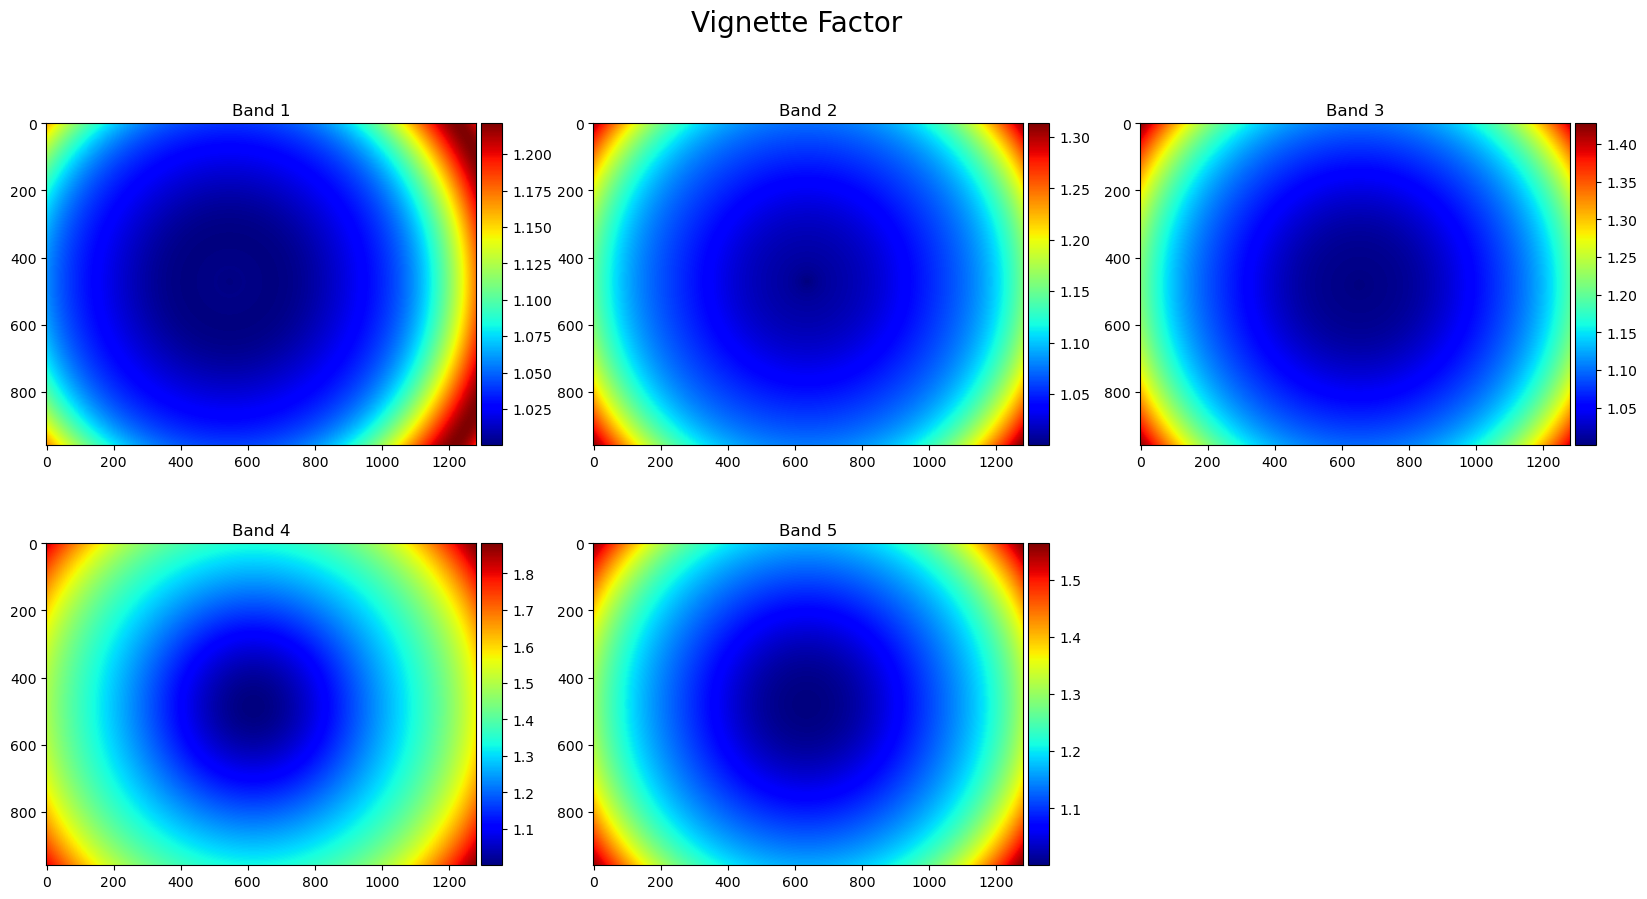

In [9]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(vignette1, cmap='jet')
im2 = ax2.imshow(vignette2, cmap='jet')
im3 = ax3.imshow(vignette3, cmap='jet')
im4 = ax4.imshow(vignette4, cmap='jet')
im5 = ax5.imshow(vignette5, cmap='jet')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Vignette Factor', fontsize=20)
plt.show()

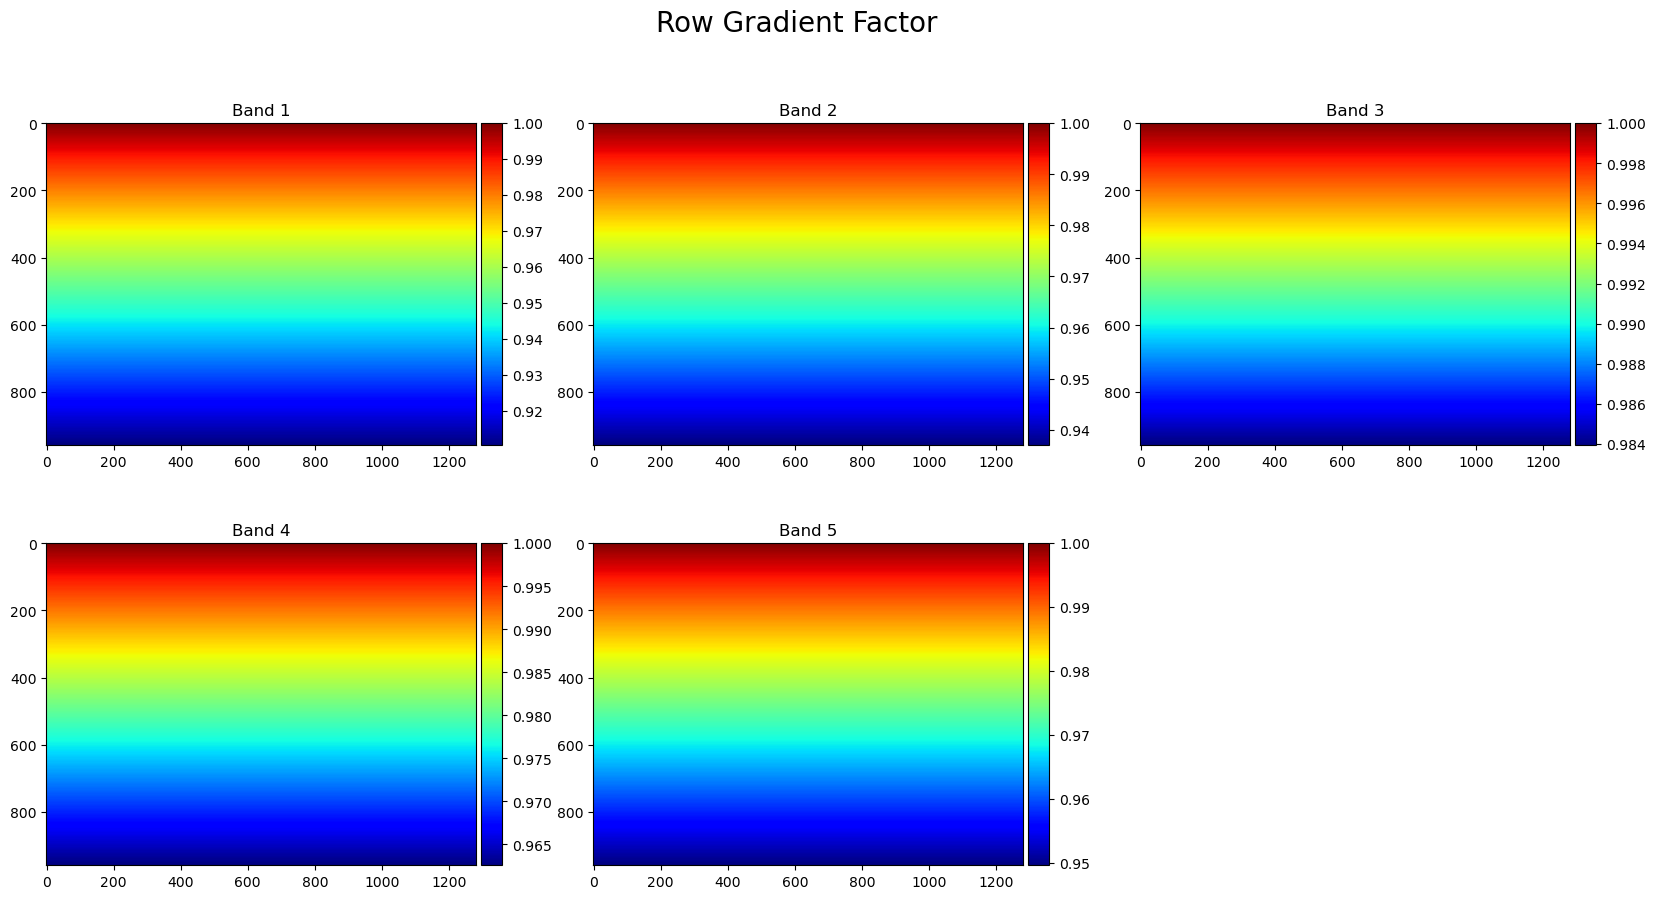

In [10]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(R1, cmap='jet')
im2 = ax2.imshow(R2, cmap='jet')
im3 = ax3.imshow(R3, cmap='jet')
im4 = ax4.imshow(R4, cmap='jet')
im5 = ax5.imshow(R5, cmap='jet')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Row Gradient Factor', fontsize=20)
plt.show()

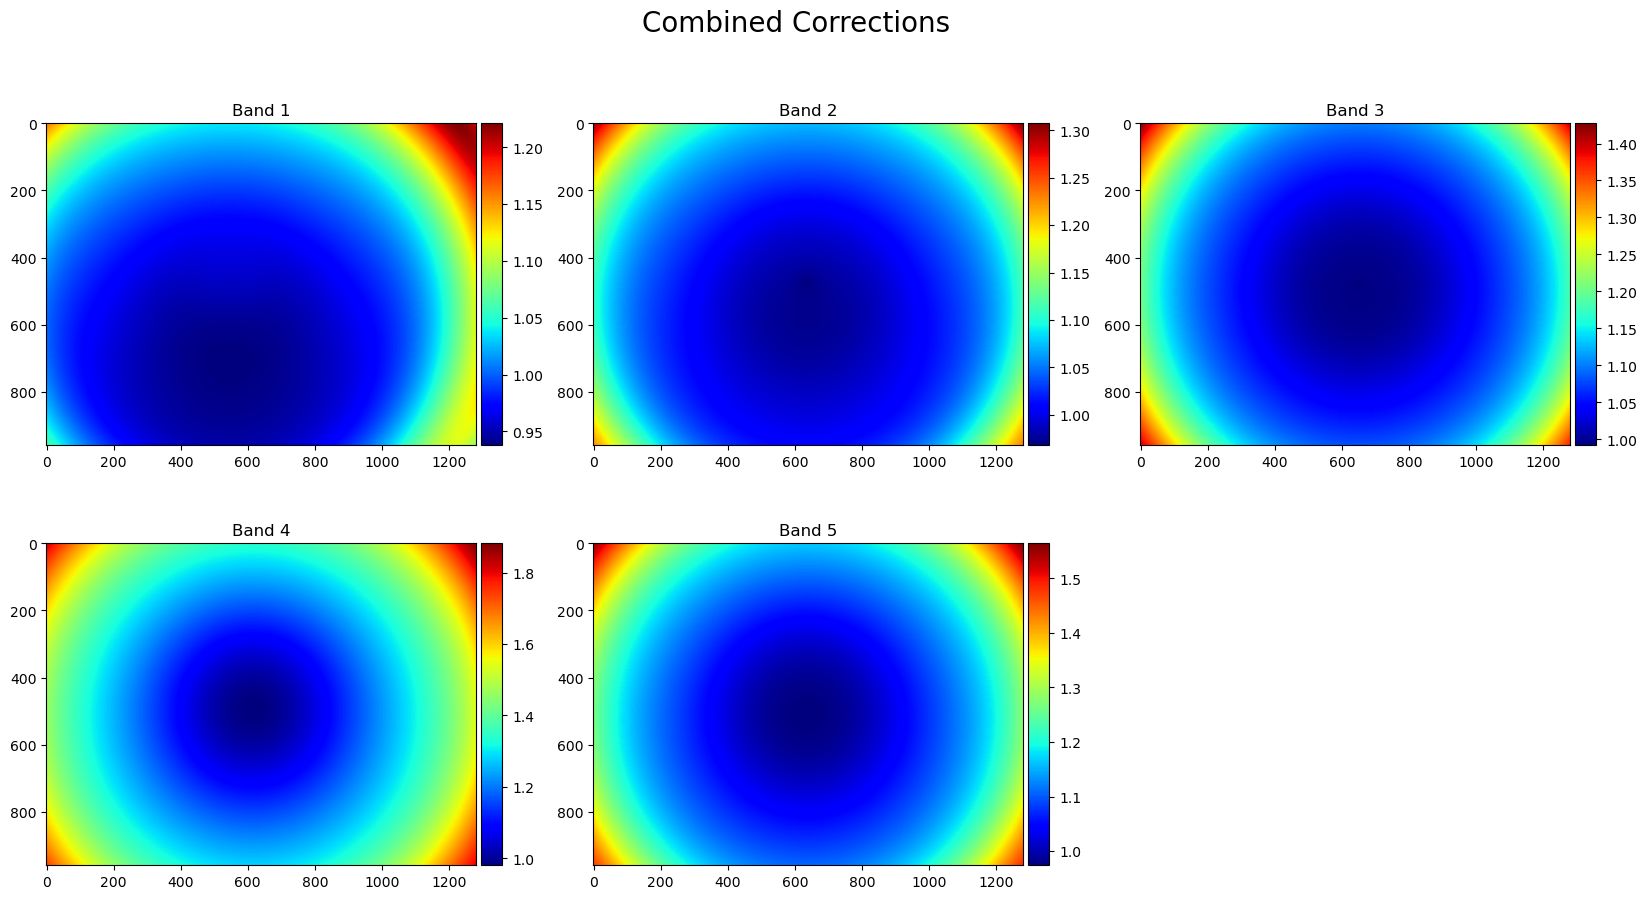

In [11]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow((vignette1 * R1), cmap='jet')
im2 = ax2.imshow((vignette2 * R2), cmap='jet')
im3 = ax3.imshow((vignette3 * R3), cmap='jet')
im4 = ax4.imshow((vignette4 * R4), cmap='jet')
im5 = ax5.imshow((vignette5 * R5), cmap='jet')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Combined Corrections', fontsize=20)
plt.show()

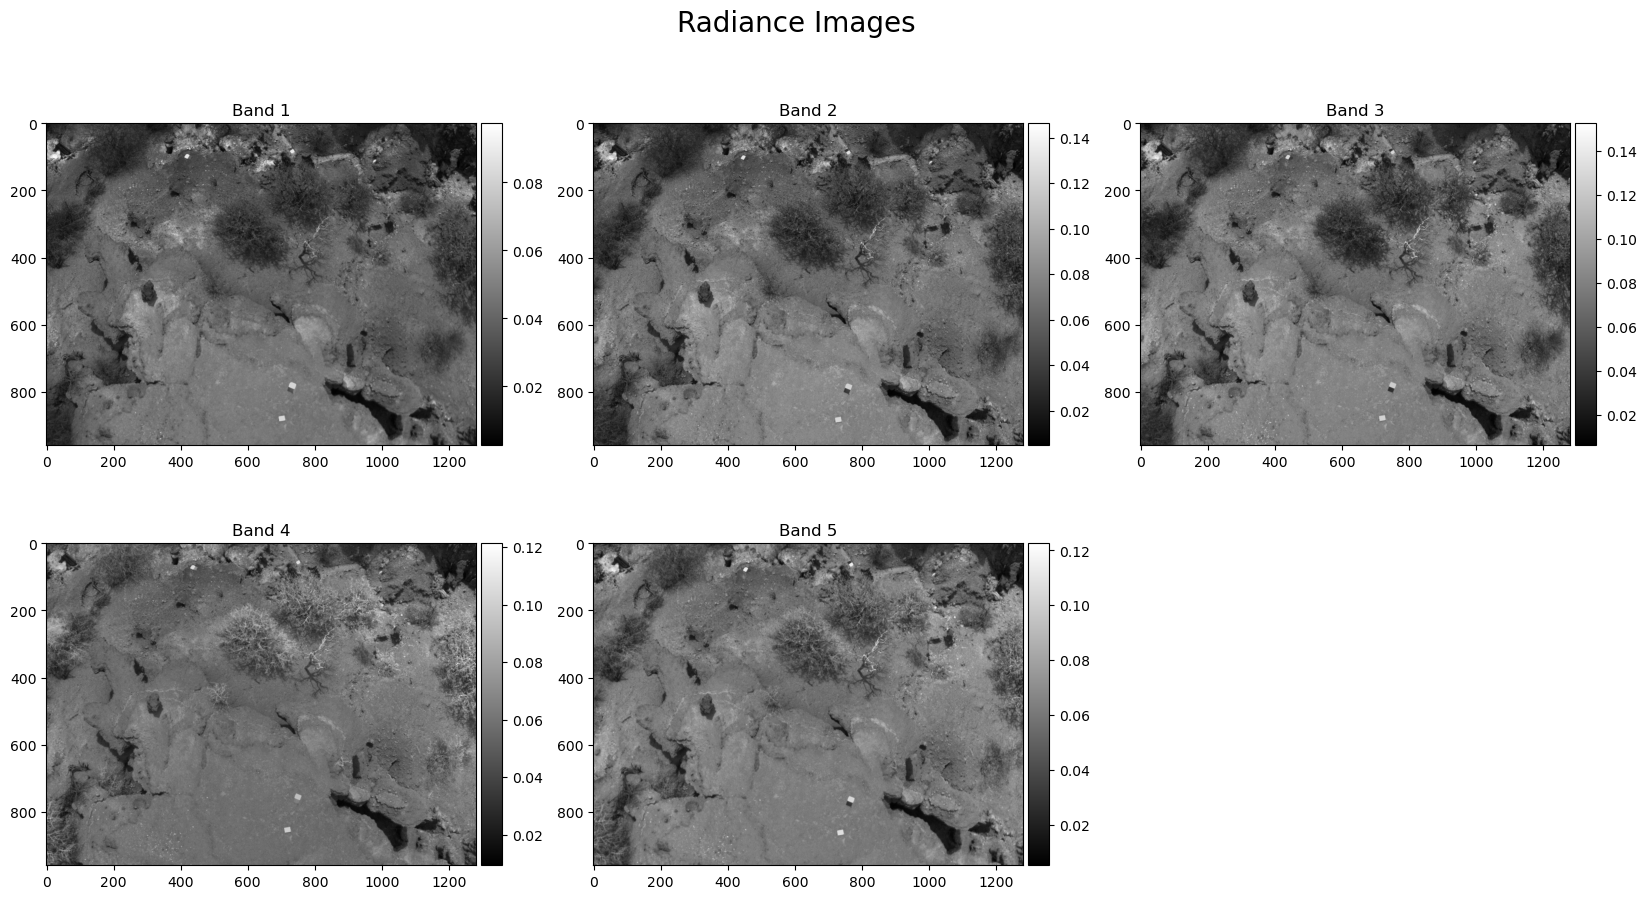

In [12]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(radianceImage1, cmap='gray')
im2 = ax2.imshow(radianceImage2, cmap='gray')
im3 = ax3.imshow(radianceImage3, cmap='gray')
im4 = ax4.imshow(radianceImage4, cmap='gray')
im5 = ax5.imshow(radianceImage5, cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
fig.suptitle('Radiance Images', fontsize=20)
plt.show()

In [13]:
RadImage1 = radianceImage1 * 1000 # or any coefficient
RadImage1 = RadImage1.astype(np.uint8)
RadImage2 = radianceImage2 * 1000 # or any coefficient
RadImage2 = RadImage2.astype(np.uint8)
RadImage3 = radianceImage3 * 1000 # or any coefficient
RadImage3 = RadImage3.astype(np.uint8)
RadImage4 = radianceImage4 * 1000 # or any coefficient
RadImage4 = RadImage4.astype(np.uint8)
RadImage5 = radianceImage5 * 1000 # or any coefficient
RadImage5 = RadImage5.astype(np.uint8)

In [14]:
# Source code from https://learnopencv.com/image-alignment-ecc-in-opencv-c-python/
sz = radianceImage3.shape
 
warp_mode = cv2.MOTION_HOMOGRAPHY
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
warp_matrix = np.eye(3, 3, dtype=np.float32)

 
# Specify the number of iterations.
number_of_iterations = 1000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

In [15]:
# Run the ECC algorithm for Band 1. The results are stored in warp_matrix.
(cc1, warp_matrix1) = cv2.findTransformECC (RadImage3,RadImage1,warp_matrix, warp_mode, criteria)
 
RadWarp1 = cv2.warpPerspective (RadImage1, warp_matrix1, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

# Run the ECC algorithm for Band 2. The results are stored in warp_matrix.
(cc2, warp_matrix2) = cv2.findTransformECC (RadImage3,RadImage2,warp_matrix, warp_mode, criteria)
 
RadWarp2 = cv2.warpPerspective (RadImage2, warp_matrix1, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

# Band 3 is same
RadWarp3 = RadImage3.copy()

# Run the ECC algorithm for Band 4. The results are stored in warp_matrix.
(cc4, warp_matrix4) = cv2.findTransformECC (RadImage3,RadImage4,warp_matrix, warp_mode, criteria)
 
RadWarp4 = cv2.warpPerspective (RadImage4, warp_matrix4, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)


# Run the ECC algorithm for Band 5. The results are stored in warp_matrix.
(cc1, warp_matrix5) = cv2.findTransformECC (RadImage3,RadImage5,warp_matrix, warp_mode, criteria)
 
RadWarp5 = cv2.warpPerspective (RadImage5, warp_matrix5, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)


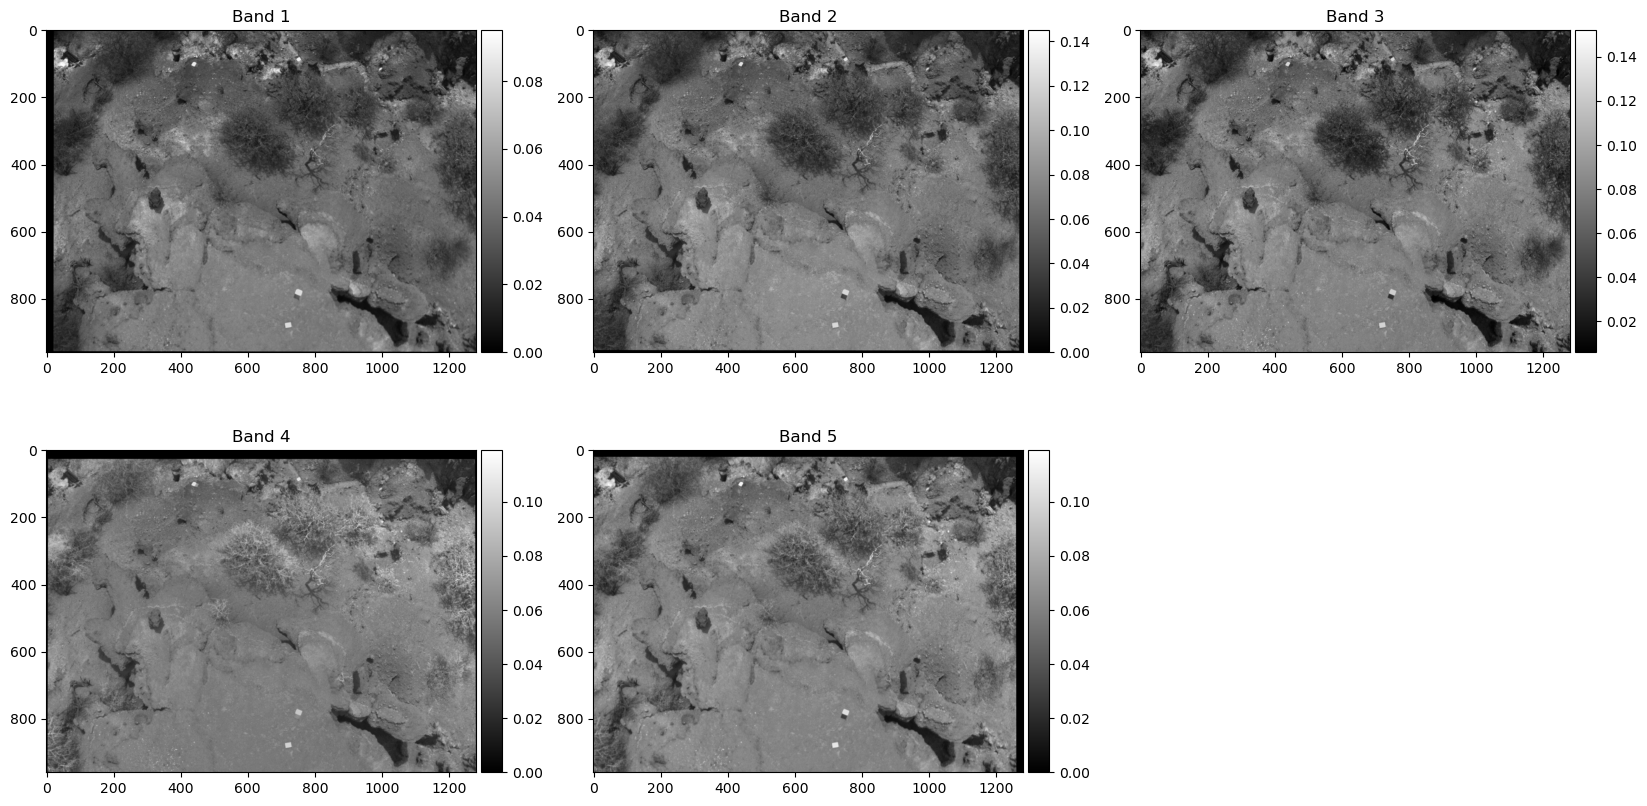

In [16]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 10))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])
im1 = ax1.imshow(RadWarp1/1000, cmap='gray')
im2 = ax2.imshow(RadWarp2/1000, cmap='gray')
im3 = ax3.imshow(RadWarp3/1000, cmap='gray')
im4 = ax4.imshow(RadWarp4/1000, cmap='gray')
im5 = ax5.imshow(RadWarp5/1000, cmap='gray')
ax1.set_title('Band 1')
ax2.set_title('Band 2')
ax3.set_title('Band 3')
ax4.set_title('Band 4')
ax5.set_title('Band 5')
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
plt.show()

In [17]:
#test = np.where(image1_warp > 0.09, image1_warp, 1)
#plt.imshow(image3_warp/ image5_warp)

In [18]:
np3D = np.dstack([RadWarp1/1000.0, RadWarp2/1000.0, RadWarp3/1000.0, RadWarp4/1000.0, RadWarp5/1000.0])
np3D.shape

(960, 1280, 5)

In [19]:
# Create an empty numpy 3D array
np3DR = np.empty([900, 1200, 5], dtype='float32')
np3DR.shape

(900, 1200, 5)

In [20]:
# Create subset image for further processing
np3DR[:,:,0] = (np3D[30:930,40:1240,0])
np3DR[:,:,1] = (np3D[30:930,40:1240,1])
np3DR[:,:,2] = (np3D[30:930,40:1240,2])
np3DR[:,:,3] = (np3D[30:930,40:1240,3])
np3DR[:,:,4] = (np3D[30:930,40:1240,4])

In [21]:
NDVI = (np3DR[:,:,3] - np3DR[:,:,2]) + (np3DR[:,:,3] + np3DR[:,:,2])

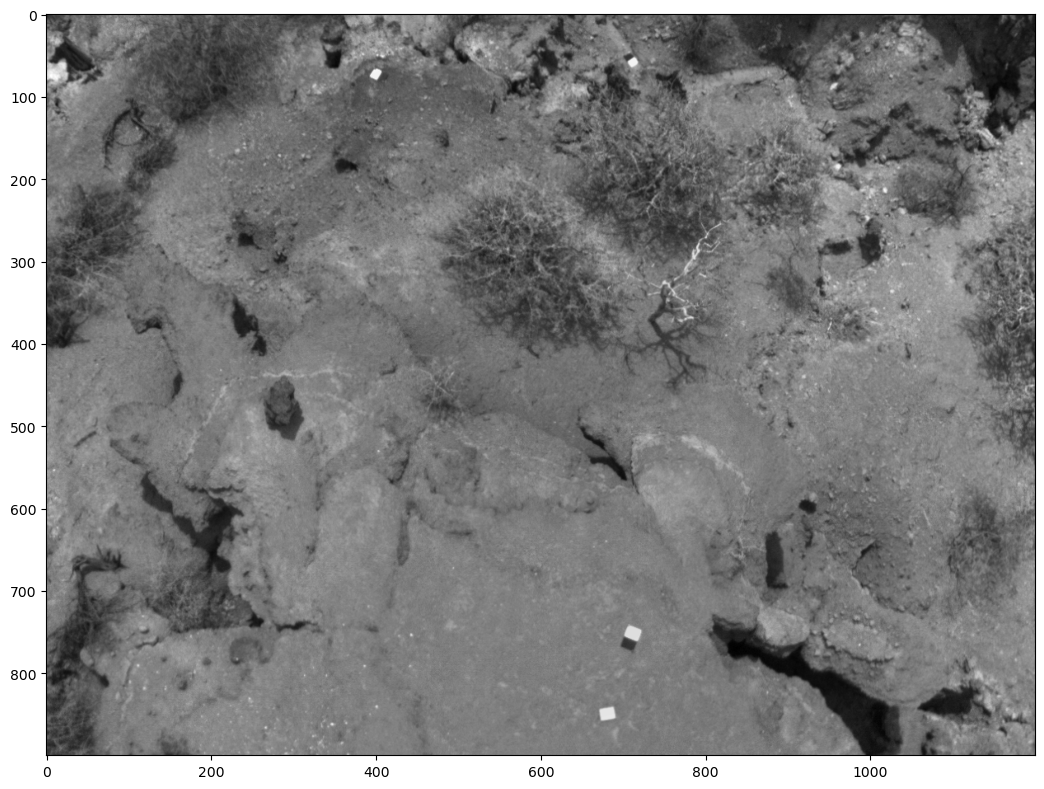

In [22]:
fig = plt.figure(figsize=(12,8))
plt.imshow(np3DR[:,:,4], interpolation = None, cmap='gray')
plt.tight_layout()

In [23]:
#%matplotlib auto
np.save('np3DRadiance.npy', np3DR)

Move to second page ;-)

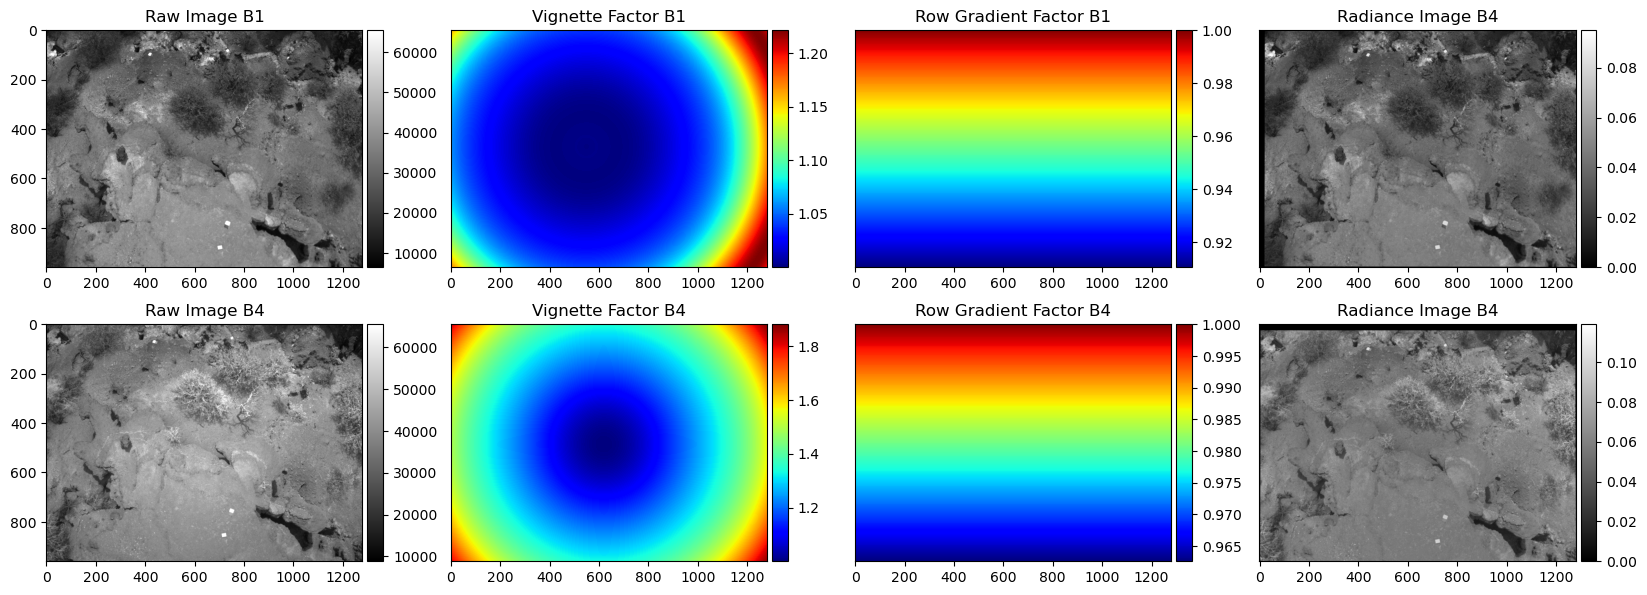

In [24]:
#fig, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(ncols=2,nrows=3,figsize=(15, 15))
fig = plt.figure(figsize=(20, 7))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[0,3])
ax5 = fig.add_subplot(spec[1,0])
ax6 = fig.add_subplot(spec[1,1])
ax7 = fig.add_subplot(spec[1,2])
ax8 = fig.add_subplot(spec[1,3])
im1 = ax1.imshow(image1, cmap='gray')
im2 = ax2.imshow(vignette1, cmap='jet')
im3 = ax3.imshow(R1, cmap='jet')
im4 = ax4.imshow(RadWarp1/1000, cmap='gray')
im5 = ax5.imshow(image4, cmap='gray')
im6 = ax6.imshow(vignette4, cmap='jet')
im7 = ax7.imshow(R4, cmap='jet')
im8 = ax8.imshow(RadWarp4/1000, cmap='gray')
ax1.set_title('Raw Image B1')
ax2.set_title('Vignette Factor B1')
ax2.get_yaxis().set_visible(False)
ax3.set_title('Row Gradient Factor B1')
ax3.get_yaxis().set_visible(False)
ax4.set_title('Radiance Image B4')
ax4.get_yaxis().set_visible(False)
ax5.set_title('Raw Image B4')
ax6.set_title('Vignette Factor B4')
ax6.get_yaxis().set_visible(False)
ax7.set_title('Row Gradient Factor B4')
ax7.get_yaxis().set_visible(False)
ax8.set_title('Radiance Image B4')
ax8.get_yaxis().set_visible(False)
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax3)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im4, cax=cax4)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im5, cax=cax5)
div6 = make_axes_locatable(ax6)
cax6 = div6.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im6, cax=cax6)
div7 = make_axes_locatable(ax7)
cax7 = div7.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im7, cax=cax7)
div8 = make_axes_locatable(ax8)
cax8 = div8.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im8, cax=cax8)
plt.savefig('DN2Radiance_Pininj_0177.png', dpi = 300)
plt.show()